# Part II - Effects of Variables on LoanStatus
## by Olisa Ofili


## Investigation Overview


> In this investigation, I looked at the characteristics of variables in the datset that may determine the LoanStatus with the main focus on EmploymentStatus, Term, BorrowerRate, ProsperScore and IncomeVerifiable amongst others.


## Dataset Overview

> The dataset consisted of 113,937 loans with 81 variables on each loan before wrangling and analysis was done on 84,853 loans and 24 columns. The rest were removed due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df['AverageCreditScore'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2


# Drop rows without prosperscore
df = df[df.ProsperScore.notna()].reset_index(drop=True)


# Filling missing DebitToIncomeRatio values with mean
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())


# Filling missing occupation values 
df['Occupation'] = df['Occupation'].fillna('Unknown')


# Convert columns to the right type 

df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

df['ProsperScore'] = df['ProsperScore'].astype(int)


# Extract month from ListingCreationDate column, convert to string and replace with month names
df['LCmonth'] = df['ListingCreationDate'].dt.month

df['LCmonth'] = df['LCmonth'].astype(str)

df['LCmonth'] = df['LCmonth'].replace(['1','2','3','4','5','6','7','8', '9','10','11','12'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])



# Extract year from ListingCreationDate column and convert to datetime
df['LCyear']= df['ListingCreationDate'].dt.year

In [4]:
# map the numeric values to their names
category_list = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].map(category_list)

df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

# list the columns of interest
features = ['ListingKey','ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate', 'ProsperScore',
            'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 
            'CurrentCreditLines', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationDate',
            'LoanOriginalAmount', 'AverageCreditScore', 'BorrowerState', 'StatedMonthlyIncome', 'Recommendations', 'LCmonth', 'LCyear']



# Create ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'EmploymentStatus': ['Not Employed', 'Self-employed', 'Part-time', 'Full-time', 'Employed', 'Retired'],
                    'LoanStatus': ['Completed', 'Chargedoff', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted'],
                    'LCmonth': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'LCyear': [2009, 2010, 2011, 2012, 2013, 2014]
                   }


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
    
df_final = df[features].copy()

In [5]:
colour = sb.color_palette()[0]

numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'CurrentCreditLines', 'DebtToIncomeRatio',
               'LoanOriginalAmount', 'AverageCreditScore', 'StatedMonthlyIncome', 'Recommendations']
categoric_vars = ['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'LCmonth', 'LCyear']

In [6]:
# functions to create countplots and histogram

def countplot_xchart(value, plot_title, dataframe=df_final, value_order=None, x_label='', y_label='', colour=sb.color_palette()[0]):
    plt.figure()
    sb.countplot(data=dataframe, x=value, order=value_order, color=colour)
    plt.title(plot_title, fontdict={'size': 16})
    plt.xlabel(x_label, fontdict={'size': 12})
    plt.ylabel(y_label, fontdict={'size': 12})

def countplot_ychart(value, plot_title, dataframe=df_final, value_order=None, y_label='', x_label='', colour=sb.color_palette()[0]):
    plt.figure()
    sb.countplot(data=dataframe, y=value, order=value_order, color=colour)
    plt.title(plot_title, fontdict={'size': 16})
    plt.ylabel(y_label, fontdict={'size': 12})
    plt.xlabel(x_label, fontdict={'size': 12})
    
def histogram_chart(value, plot_title, dataframe=df_final, bins=None, x_label='', y_label='', colour=sb.color_palette()[0]):
    plt.figure()
    plt.hist(data=dataframe, x=value, bins=bins, color=colour)
    plt.title(plot_title, fontdict={'size': 16})
    plt.xlabel(x_label, fontdict={'size': 12})
    plt.ylabel(y_label, fontdict={'size': 12})


## Loan Status
Those with Current, Completed and Chargedoff LoanStatus account for most of the the loan status.

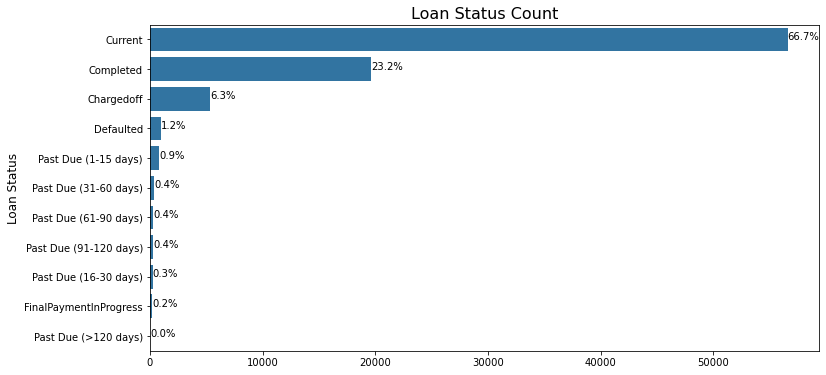

In [7]:
plt.figure(figsize=(12,6))

top_loanstatus = df_final.LoanStatus.value_counts().index
ax = sb.countplot(data=df_final, y='LoanStatus', order=top_loanstatus, color=colour)

total = len(df_final['LoanStatus'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.title('Loan Status Count', fontdict={'size': 16})
plt.ylabel('Loan Status', fontdict={'size': 12})
plt.xlabel('', fontdict={'size': 12})
    
plt.show()

## Employment Status
Most people taking the loans are Employed.

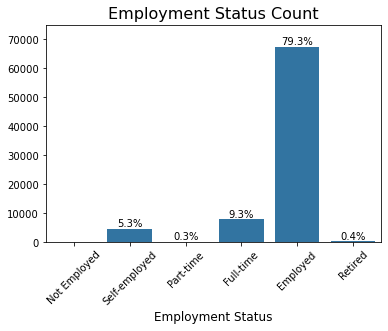

In [8]:
ax = sb.countplot(data=df_final, x='EmploymentStatus', color=colour)
plt.xticks(rotation=45);

total = len(df_final['EmploymentStatus'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), va='bottom', ha='center')
    plt.ylim([0,75000])
    
    plt.title('Employment Status Count', fontdict={'size': 16})
    plt.ylabel('', fontdict={'size': 12})
    plt.xlabel('Employment Status', fontdict={'size': 12})
    
plt.show()

## Income Range
Most people are within the income range of about `$`50,000 - `$`74,999.

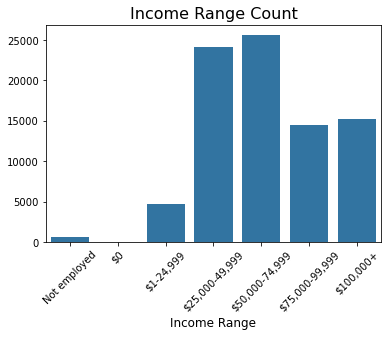

In [9]:
countplot_xchart(value='IncomeRange', plot_title='Income Range Count', x_label='Income Range')
plt.xticks(rotation=45);

## Loan Original Amount
Loan Original Amount appears to be mostly below $5,000.

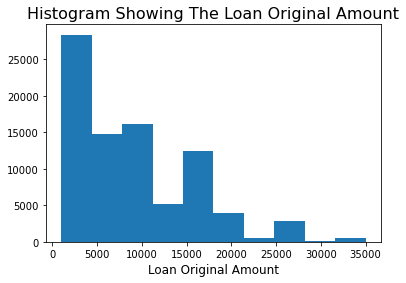

In [10]:
histogram_chart(value='LoanOriginalAmount', plot_title='Histogram Showing The Loan Original Amount', x_label='Loan Original Amount')

## Relationship Between Numeric Variables

- Correlation shows the relationship between variables. Positive correlation means both variables increase at the same time and negative correlation means as one increases, the other decreases. 
- The heat map shows a strong positive correlation between BorrowerAPR and BorrowerRate while also highlighting the positive correlations between ProsperScore and AverageCreditScore, Term and LoanOriginalAmount and LoanOriginalAmount and AverageCreditScore.
- There are also negative correlations with the largest being between ProsperScore and BorrowerAPR.

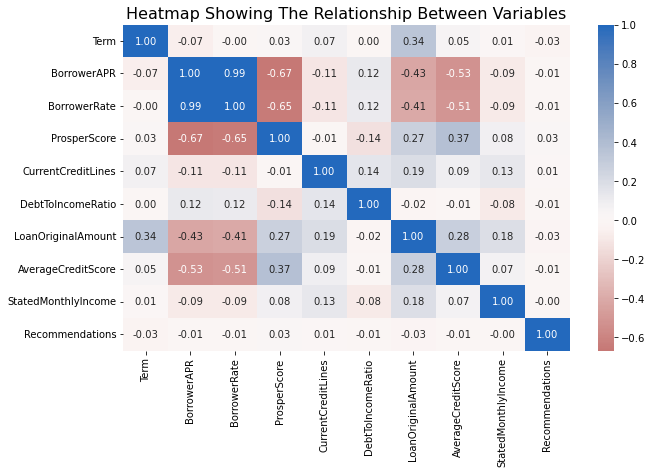

In [11]:
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(df_final[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)

plt.title('Heatmap Showing The Relationship Between Variables', fontdict={'size': 16})
plt.show()

## IncomeRange and Term

More people favour the longer term for loans irrespective of their income range.

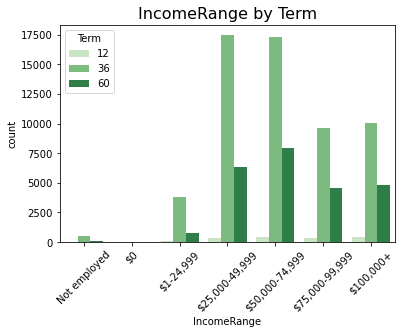

In [12]:
sb.countplot(data = df_final, x = 'IncomeRange', hue = 'Term', palette = 'Greens')
plt.legend(loc = 2, ncol = 1, title='Term')
plt.title('IncomeRange by Term', fontdict={'size': 16});
plt.xticks(rotation=45);

plt.show()

## Loan Status, Borrower Rate and ProsperScore

The chart below shows that the Borrower Rate for 'Defaulted' LoanStatus appears to be higher than 'Completed' for all ProsperScore.

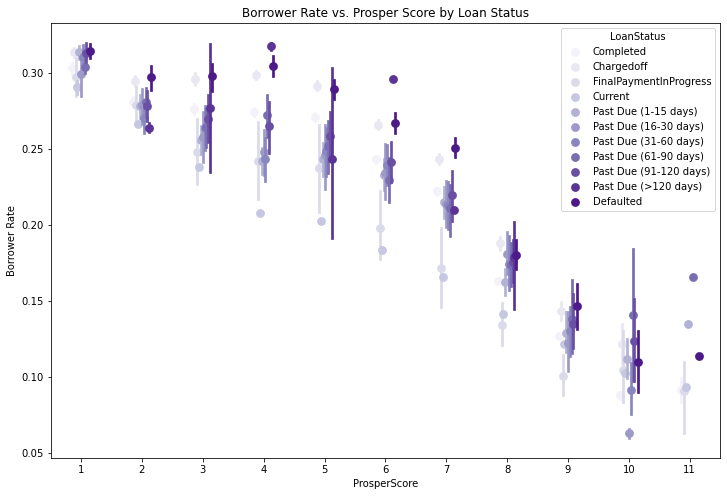

In [13]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data = df_final, x = 'ProsperScore', y = 'BorrowerRate', hue = 'LoanStatus',
           palette = 'Purples', linestyles = '', dodge = 0.3)
plt.title('Borrower Rate vs. Prosper Score by Loan Status')
plt.ylabel('Borrower Rate')
plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck-main.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck-main.ipynb to slides
[NbConvertApp] Writing 845736 bytes to Part_II_slide_deck-main.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck-main.slides.html
Use Control-C to stop this server
